In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [3]:

df = df.drop(columns=df.columns[2:], errors="ignore")

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [6]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.preprocessing import LabelEncoder
lb1=LabelEncoder()
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df['target']=lb1.fit_transform(df['target'])

In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.duplicated().sum()

np.int64(403)

In [11]:
df=df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()


np.int64(0)

DATA CLEANING


In [13]:
df.isnull()


,target,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [14]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1b3d3162cf0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

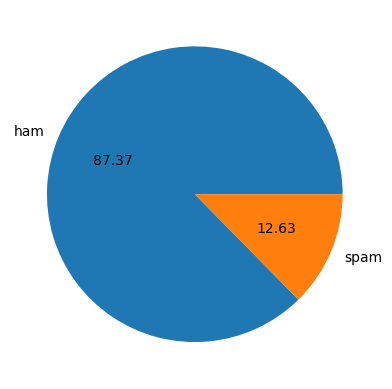

In [15]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [16]:
!pip install nltk

In [17]:
import nltk

In [18]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\BIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
df['num_charchters']=df['text'].apply(len)

C:\Users\BIT\AppData\Local\Temp\ipykernel_24884\437584785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_charchters']=df['text'].apply(len)


In [20]:
df.head()

,target,text,num_charchters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
#number of words
from nltk.tokenize import word_tokenize
df['num_words']=df['text'].apply(lambda x: len(word_tokenize(x)))


C:\Users\BIT\AppData\Local\Temp\ipykernel_24884\2531637017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x: len(word_tokenize(x)))


In [22]:
df.head()

,target,text,num_charchters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
from nltk.tokenize import sent_tokenize
df['num_sentences']=df['text'].apply(lambda x: len(sent_tokenize(x)))

C:\Users\BIT\AppData\Local\Temp\ipykernel_24884\1723366176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x: len(sent_tokenize(x)))


In [24]:
df.head()

,target,text,num_charchters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df.rename(columns={'num_charchters':'num_characters'},inplace=True)

C:\Users\BIT\AppData\Local\Temp\ipykernel_24884\3764475248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'num_charchters':'num_characters'},inplace=True)


In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns

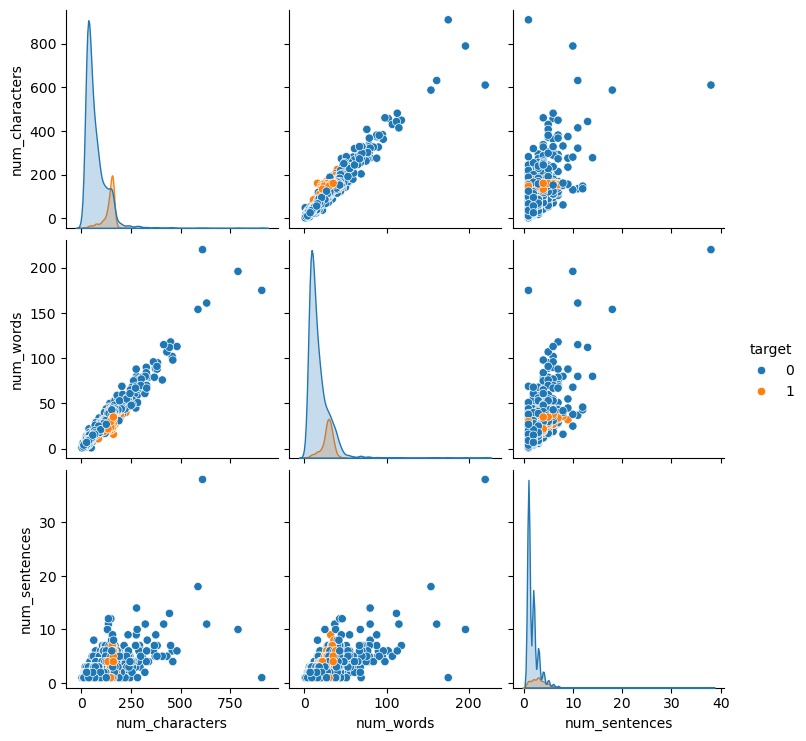

In [30]:
sns.pairplot(df,hue='target')
#Assign different colors to each unique value in target.

<Axes: >

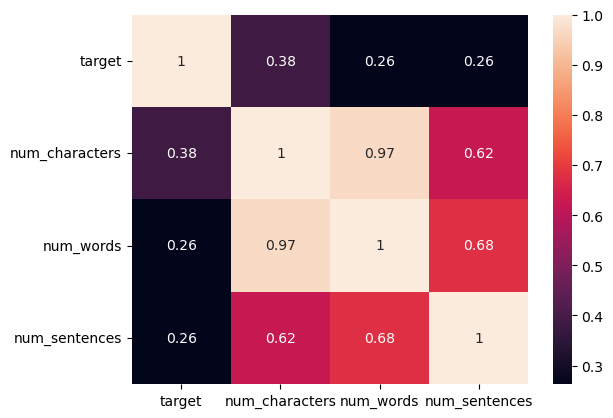

In [31]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# DATA PREPROCESSING

In this phase, we'll transform the raw text data through several steps:
- Converting text to lowercase
- Tokenization (breaking text into words)
- Removing special characters 
- Removing stop words and punctuation
- Stemming (reducing words to their root form)

This preprocessing helps standardize the text data for better model performance.

**LOWER CASE**

**TOKENIZATION**

**REMOVE SPECIAL CHARACTERS**

**REMOVE STOP WORDS AND PUNCTUATION**

**STEMMING**

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps=PorterStemmer()




def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
     
    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [35]:
transform_text('hi there priyanshu here!!! tell about yourself?')

'hi priyanshu tell'

In [36]:
df['tranformed_text']=df['text'].apply(transform_text)

C:\Users\BIT\AppData\Local\Temp\ipykernel_24884\4055103722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tranformed_text']=df['text'].apply(transform_text)


In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
!pip install wordcloud


In [39]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [40]:
spam_wc=wc.generate(df[df['target']==1]['tranformed_text'].str.cat(sep=""))

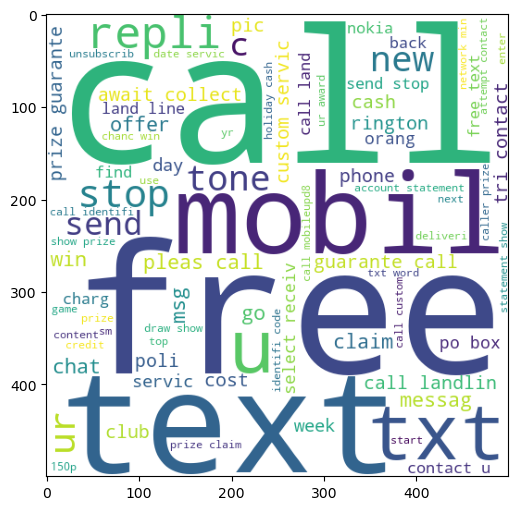

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [42]:
ham_wc=wc.generate(df[df['target']==0]['tranformed_text'].str.cat(sep=""))

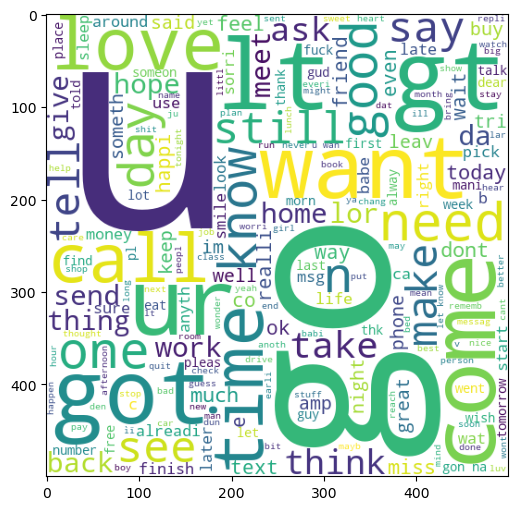

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [44]:
spam_corpus=[]
for msg in df[df['target']==1]['tranformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

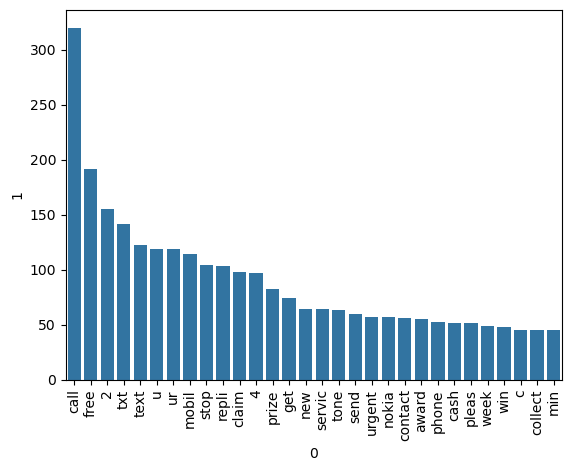

In [45]:
from collections import Counter
sns.barplot(
  x=  pd.DataFrame(Counter(spam_corpus).most_common(30))[0],   # x-axis: top 30 words
   y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1]    # y-axis: their frequencies
)
plt.xticks(rotation='vertical')
plt.show()

In [46]:
ham_corpus=[]
for msg in df[df['target']==0]['tranformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

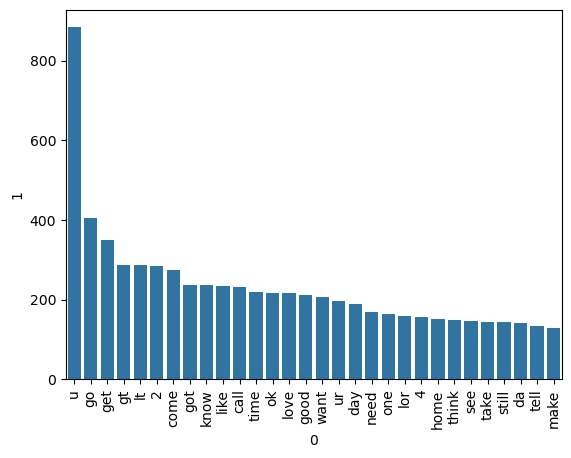

In [47]:
from collections import Counter
sns.barplot(
  x=  pd.DataFrame(Counter(ham_corpus).most_common(30))[0],   # x-axis: top 30 words
   y= pd.DataFrame(Counter(ham_corpus).most_common(30))[1]    # y-axis: their frequencies
)
plt.xticks(rotation='vertical')
plt.show()

**MODEL BUILDING**

In [96]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# What CountVectorizer does:
# Converts text documents into a matrix of token counts (Bag of Words model).
# Each row = one document (SMS message in our case).
# Each column = one unique word across all documents.
# Each cell = count of that word in that document.


# TF-IDF Vectorizer (Term Frequency–Inverse Document Frequency) is a text feature
# extraction technique used in Natural Language Processing (NLP) and Information 
# Retrieval to convert text data into numerical vectors.
tfdif=TfidfVectorizer(max_features=3000)
cv=CountVectorizer()


In [97]:
# X=cv.fit_transform(df['tranformed_text']).toarray()
X=tfdif.fit_transform(df['tranformed_text']).toarray()

In [98]:
X.shape

(5169, 3000)

In [99]:
y=df['target'].values

In [100]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [102]:
from sklearn.model_selection import train_test_split


In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [104]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [105]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [106]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.868522815158546
[[967 140]
 [ 30 156]]
0.527027027027027


In [109]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)

In [110]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9706109822119103
[[1105    2]
 [  36  150]]
0.9868421052631579


In [111]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)

In [112]:
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729311678267595
[[1103    4]
 [  31  155]]
0.9748427672955975


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [114]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [115]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'Adaboost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb

}

In [116]:
def training(c,X_train,y_train,X_test,y_test):
    c.fit(X_train,y_train)
    y_pred=c.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [117]:
accuracy_scores=[]
precision_scores=[]

In [118]:
for name,c in clfs.items():
    curr_accuracy,curr_precision=training(c,X_train,y_train,X_test,y_test)
    print(name)
    print("accuracy--",curr_accuracy)
    print("precision---",curr_precision)
    accuracy_scores.append(curr_accuracy)
    precision_scores.append(curr_precision)
    

SVC
accuracy-- 0.9775715390564579
precision--- 0.9700598802395209
KN
accuracy-- 0.9033255993812839
precision--- 1.0
NB
accuracy-- 0.9706109822119103
precision--- 0.9868421052631579
DT
accuracy-- 0.9334880123743233
precision--- 0.8472222222222222
LR
accuracy-- 0.9474091260634184
precision--- 0.9041095890410958
RF
accuracy-- 0.9721577726218097
precision--- 1.0
Adaboost
accuracy-- 0.91415313225058
precision--- 0.8048780487804879
BgC
accuracy-- 0.9574632637277649
precision--- 0.861878453038674
ETC
accuracy-- 0.9729311678267595
precision--- 0.968944099378882
GBDT
accuracy-- 0.9474091260634184
precision--- 0.9538461538461539
xgb
accuracy-- 0.97138437741686
precision--- 0.9745222929936306


In [119]:
performance=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [120]:
performance

,Algorithm,Accuracy,Precision
1,KN,0.903326,1.000000
5,RF,0.972158,1.000000
2,NB,0.970611,0.986842
10,xgb,0.971384,0.974522
0,SVC,0.977572,0.970060
8,ETC,0.972931,0.968944
9,GBDT,0.947409,0.953846
4,LR,0.947409,0.904110
7,BgC,0.957463,0.861878
3,DT,0.933488,0.847222


In [121]:
import pickle
pickle.dump(tfdif,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))